Dans ce projet, ***trois modèles*** de classification supervisée ont été développés pour comparer leurs performances sur un ensemble de données donné. Le premier modèle est le ***SVC*** (Support Vector Classifier), qui utilise des hyperplans pour séparer les classes dans un espace de caractéristiques à haute dimension, offrant une grande efficacité pour des problèmes de classification non linéaire. Le second modèle est le ***DecisionTreeClassifier***, un algorithme d'apprentissage par arbre de décision qui segmente l'espace de caractéristiques en partitions homogènes, basé sur des critères comme l'entropie ou la mesure Gini, permettant une interprétabilité intuitive. Le troisième modèle est la ***LogisticRegression***, paramétrée avec un maximum d'itérations fixé à 480, pour assurer une convergence adéquate dans des cas où les données sont nombreuses ou complexes. Ce modèle est particulièrement utile pour des problèmes de classification binaire, transformant la sortie en probabilités grâce à une fonction logistique. Chaque modèle a été configuré pour tester son efficacité et son adaptabilité aux données, dans le but d'identifier le classifieur le plus performant pour le problème en question. 
Source des données: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

# 1- importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.base import clone

# 2- Collecte et nettoyage des données

# Source des données: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

Le jeu de données xAPI-Edu-Data est un ensemble de données éducatives collectées à partir du système de gestion de l'apprentissage (LMS) Kalboard 360. Ce LMS est une plateforme multi-agents qui facilite l'apprentissage en ligne.

Le jeu de données contient des informations sur les performances académiques des étudiants, incluant diverses caractéristiques telles que :

1. Genre
2. Niveau d'éducation des parents
3. Type d'école fréquentée
4. Heures d'étude hebdomadaires
5. Notes obtenues
6. Participation aux activités parascolaires
7. Absences
Ces variables permettent d'analyser et de prédire les performances académiques des étudiants, offrant ainsi des perspectives pour améliorer les méthodes d'enseignement et identifier les facteurs influençant la réussite scolaire.

In [2]:
df = pd.read_csv("edu-data.csv")
df.sample(1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
128,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,12,10,20,16,No,Bad,Under-7,L


Dans le contexte de la base de données xAPI-Edu-Data, xAPI (Experience API) joue un rôle crucial en tant que standard d'interopérabilité pour capturer, stocker et analyser les données liées aux activités d'apprentissage. Voici comment xAPI contribue à cette base de données :

1. Collecte de Données : xAPI permet de recueillir des données sur les interactions des apprenants avec les plateformes d'apprentissage, les ressources éducatives, et d'autres activités d'apprentissage en ligne et hors ligne.

2. Suivi des Performances : Grâce à xAPI, il est possible de suivre les progrès des étudiants de manière détaillée, en enregistrant des événements tels que la complétion de cours, les tests réussis ou échoués, et l'engagement dans les activités éducatives.

3. Analyse et Prédiction : Les données collectées via xAPI sont utilisées pour analyser les performances des étudiants, identifier les modèles de réussite ou d'échec, et prédire les résultats futurs. Cela aide les éducateurs à adapter les stratégies d'enseignement en fonction des besoins spécifiques des apprenants.

4. Interopérabilité : xAPI permet l'intégration de données provenant de différentes sources, ce qui enrichit la base de données avec des informations diverses, augmentant ainsi la précision et l'efficacité des analyses.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#3- Preprocessing

In [4]:
numeric_attr = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
scaler = MinMaxScaler()
df[numeric_attr] = scaler.fit_transform(df[numeric_attr])

## Separation des features and target

In [5]:
fetures = df.loc[:,:"StudentAbsenceDays"]
target = df.loc[:,"Class"]

## Remplacement des colonnes catégorielles par des nombres

In [6]:
replace_gender = {'gender': {'F': 1, 'M': 2}}
replace_nat = {'NationalITy': {'KW': 1, 'lebanon': 2, 'Egypt': 3, 'SaudiArabia': 4,
                               'USA':5,'Jordan': 6, 'venzuela': 7, 'Iran': 8 , 'Tunis': 9 ,
                               'Morocco': 10,'Syria': 11,'Palestine': 12,'Iraq': 13,'Lybia': 14}}

replace_place = {'PlaceofBirth': {'KuwaIT': 1, 'lebanon': 2, 'Egypt': 3, 'SaudiArabia': 4
                                  , 'USA':5,'Jordan': 6, 'venzuela': 7, 'Iran': 8 , 'Tunis': 9 ,
                                  'Morocco': 10,'Syria': 11,'Iraq': 12,'Palestine': 13,'Lybia': 14}}
replace_stage = {'StageID': {'lowerlevel': 1, 'MiddleSchool': 2, 'HighSchool': 3}}
replace_grade = {'GradeID': {'G-02':1,'G-04':2, 'G-05':3,'G-06':4,'G-07':5,'G-08':6,'G-09':7,'G-10':8,'G-11':9,'G-12':10}}
replace_sec = {'SectionID': {'A': 1, 'B': 2, 'C': 3}}
replace_topic = {'Topic': {'Arabic': 1, 'Biology': 2,'Chemistry': 3,
                           'English': 4, 'French':5,'Geology': 6,
                           'History': 7, 'IT': 8 , 'Math': 9 ,
                           'Quran': 10,'Science': 11,'Spanish': 12}}
replace_sems = {'Semester': {'F': 1, 'S': 2}}
replace_rel = {'Relation': {'Father': 1, 'Mum': 2}}
replace_pas = {'ParentAnsweringSurvey': {'Yes': 1, 'No': 2}}
replace_pss = {'ParentschoolSatisfaction': {'Bad': 1, 'Good': 2}}
replace_sad = {'StudentAbsenceDays': {'Above-7': 1, 'Under-7': 2}}

In [7]:
fetures.replace(replace_gender,inplace=True)
fetures.replace(replace_nat,inplace=True)
fetures.replace(replace_place,inplace=True)
fetures.replace(replace_stage,inplace=True)
fetures.replace(replace_grade,inplace=True)
fetures.replace(replace_sec,inplace=True)
fetures.replace(replace_topic,inplace=True)
fetures.replace(replace_sems,inplace=True)
fetures.replace(replace_rel,inplace=True)
fetures.replace(replace_pas,inplace=True)
fetures.replace(replace_pss,inplace=True)
fetures.replace(replace_sad,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4416\2137061511.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fetures.replace(replace_gender,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4416\2137061511.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fetures.replace(replace_nat,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4416\2137061511.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_

In [8]:
fetures.sample(1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
25,2,1,1,2,5,1,8,1,1,0.08,0.070707,0.306122,0.397959,1,2,1


In [9]:
replace_class =  {'L': 1, 'M': 2 , 'H':3}
target.replace(replace_class,inplace=True)
target

C:\Users\user\AppData\Local\Temp\ipykernel_4416\379815796.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target.replace(replace_class,inplace=True)


0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

In [10]:
y = target
X = fetures

# 4- Entrainement et evaluation de resulats

In [11]:
models = {}
models['SVC'] = SVC()
models['DecisionTreeClassifier'] = DecisionTreeClassifier()
models['LogisticRegression'] = LogisticRegression(max_iter = 480)

In [12]:
conf_matrix_list_of_arrays = {}
conf_matrix_list_of_arrays["SVC"] = []
conf_matrix_list_of_arrays["DecisionTreeClassifier"] = []
conf_matrix_list_of_arrays["LogisticRegression"] = []
accuracy_results = {"SVC" : {"train":0, "test":0},"DecisionTreeClassifier" : {"train":0, "test":0},"LogisticRegression" : {"train":0, "test":0}}
f1score_results = {"SVC" : {"train":0, "test":0},"DecisionTreeClassifier" : {"train":0, "test":0},"LogisticRegression" : {"train":0, "test":0}}
kf = n_splits=10its=10)
for model in models:
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cloned_model = clone(models[model])
    cloned_model.fit(X_train, y_train)
    predictions_test = cloned_model.predict(X_test)
    predictions_train = cloned_model.predict(X_train)
    accuracy_results[model]["train"] += accuracy_score(y_train,predictions_train)
        
    
    accuracy_results[model]["test"] += accuracy_score(y_test,predictions_test)
    
    
    f1score_results[model]["train"] += f1_score(y_train,predictions_train,average='macro')
    
    
    f1score_results[model]["test"] += f1_score(y_test,predictions_test,average='macro')

    conf_matrix = confusion_matrix(y_test, predictions_test)
    conf_matrix_list_of_arrays[model].append(conf_matrix)
  accuracy_results[model]["train"] = accuracy_results[model]["train"] / 10
  accuracy_results[model]["test"] = accuracy_results[model]["test"] / 10
  f1score_results[model]["train"] = f1score_results[model]["train"] / 10
  f1score_results[model]["test"] = f1score_results[model]["test"] / 10
  conf_matrix_list_of_arrays[model] = np.mean(conf_matrix_list_of_arrays[model], axis=0)
  print(model + ":")
  print("Accuracy:" , 'train: ', accuracy_results[model]["train"], '| test: ', accuracy_results[model]["test"])
  print("F1-score:" , 'train: ', f1score_results[model]["train"], '| test: ', f1score_results[model]["test"])
  print("Confusion Matrix:\n" , conf_matrix_list_of_arrays[model])
  print("---------------------------------------------------------")

TypeError: KFold.__init__() got an unexpected keyword argument 'n_s10its'

# 5- SVM Hyperparameters Tuning 

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, 
                                                    random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 384 samples.
Testing set has 96 samples.


In [16]:
param_svc = {'C':[0.1, 1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['linear','rbf']}
grid_svc = GridSearchCV(SVC(),param_svc)
grid_svc.fit(X_train,y_train)
grid_svc_pred_test = grid_svc.predict(X_test)
grid_svc_pred_train = grid_svc.predict(X_train)

In [17]:
accuracy_results_train = accuracy_score(y_train,grid_svc_pred_train)
accuracy_results_test = accuracy_score(y_test,grid_svc_pred_test)


f1score_results_train = f1_score(y_train,grid_svc_pred_train,average='macro')
f1score_results_test= f1_score(y_test,grid_svc_pred_test,average='macro')


conf_matrix = confusion_matrix(y_test,grid_svc_pred_test)

In [18]:
print("SVC accuracy after grid search ", "train ->", accuracy_results_train)
print("SVC accuracy after grid search ", "test ->", accuracy_results_test)
print("SVC F1-score after grid search ", "train ->", f1score_results_train)
print("SVC F1-score after grid search ", "test ->", f1score_results_test)
print("SVC F1-score after grid search ", "\nconfusion matrix ->\n", conf_matrix)

SVC accuracy after grid search  train -> 0.7864583333333334
SVC accuracy after grid search  test -> 0.71875
SVC F1-score after grid search  train -> 0.7922821371319365
SVC F1-score after grid search  test -> 0.7290603299164027
SVC F1-score after grid search  
confusion matrix ->
 [[22  1  0]
 [ 4 31 10]
 [ 0 12 16]]


# Affichage des Matrices de confusion

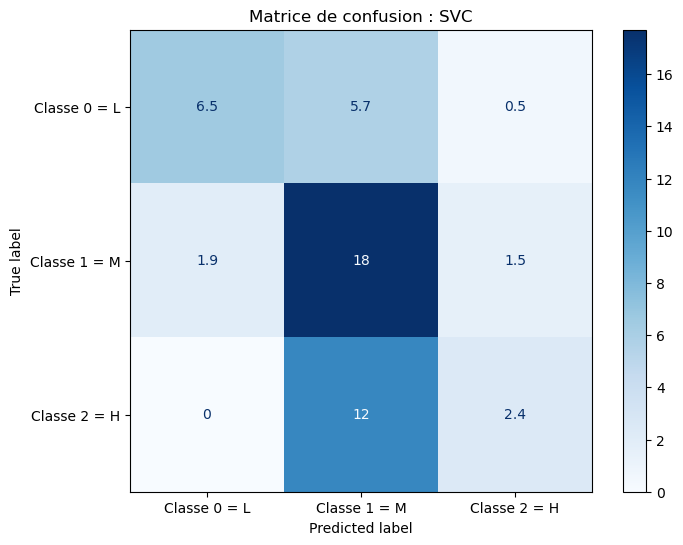

In [19]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Votre matrice de confusion (liste)
confusion_matrix_svc = [[6.5, 5.7, 0.5],
                        [1.9, 17.7, 1.5],
                        [0, 11.8, 2.4]]

# Convertir la matrice en tableau NumPy
confusion_matrix_svc = np.array(confusion_matrix_svc)

# Noms des classes (facultatif, remplacez par les vôtres si nécessaires)
class_names = ['Classe 0 = L', 'Classe 1 = M', 'Classe 2 = H']

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svc, display_labels=class_names).plot(cmap='Blues', ax=plt.gca())
plt.title('Matrice de confusion : SVC')
plt.show()



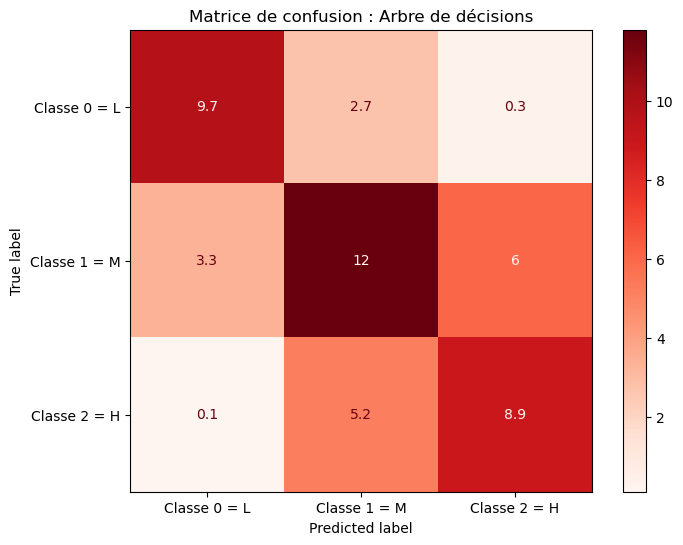

In [20]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Votre matrice de confusion (liste)
confusion_matrix_svc = [[9.7,  2.7,  0.3],
                        [3.3, 11.8,  6.],
                        [0.1,  5.2,  8.9]]

# Convertir la matrice en tableau NumPy
confusion_matrix_svc = np.array(confusion_matrix_svc)

# Noms des classes (facultatif, remplacez par les vôtres si nécessaires)
class_names = ['Classe 0 = L', 'Classe 1 = M', 'Classe 2 = H']

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svc, display_labels=class_names).plot(cmap='Reds', ax=plt.gca())
plt.title('Matrice de confusion : Arbre de décisions')
plt.show()



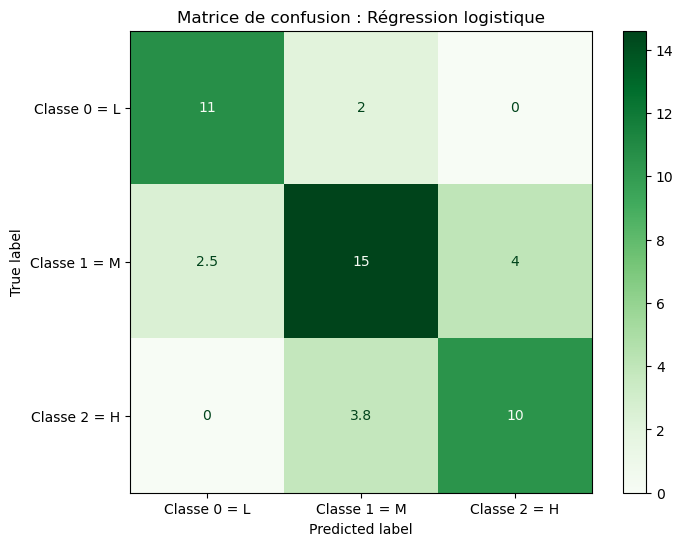

In [21]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Votre matrice de confusion (liste)
confusion_matrix_svc = [[10.7,  2,   0.],
                        [2.5, 14.6,  4.],
                        [0,   3.8, 10.4]]

# Convertir la matrice en tableau NumPy
confusion_matrix_svc = np.array(confusion_matrix_svc)

# Noms des classes (facultatif, remplacez par les vôtres si nécessaires)
class_names = ['Classe 0 = L', 'Classe 1 = M', 'Classe 2 = H']

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svc, display_labels=class_names).plot(cmap='Greens', ax=plt.gca())
plt.title('Matrice de confusion : Régression logistique')
plt.show()



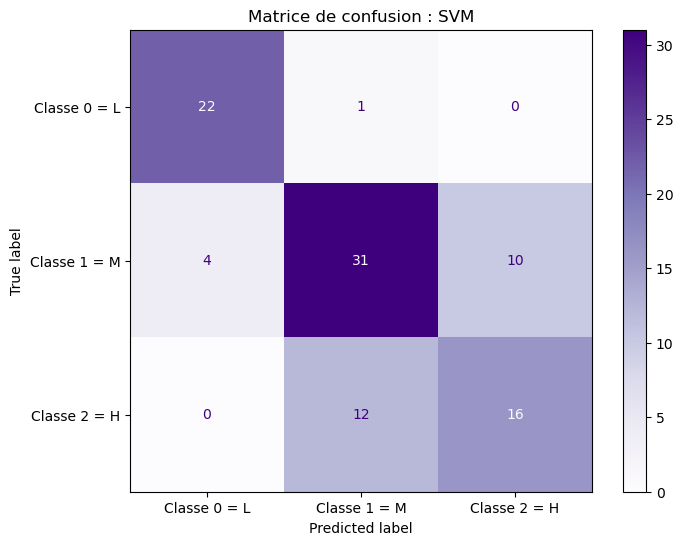

In [22]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Votre matrice de confusion (liste)
confusion_matrix_svc = [[22,  1,  0],
                        [4, 31, 10],
                        [0, 12, 16]]

# Convertir la matrice en tableau NumPy
confusion_matrix_svc = np.array(confusion_matrix_svc)

# Noms des classes (facultatif, remplacez par les vôtres si nécessaires)
class_names = ['Classe 0 = L', 'Classe 1 = M', 'Classe 2 = H']

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svc, display_labels=class_names).plot(cmap='Purples', ax=plt.gca())
plt.title('Matrice de confusion : SVM')
plt.show()



La matrice de confusion fournie pour le modèle SVC (Support Vector Classifier) est une matrice 3x3, indiquant les résultats de la classification sur un problème à trois classes. Voici comment interpréter cette matrice :

Prédit : Classe 0	Prédit : Classe 1	Prédit : Classe 2
Réel : Classe L	22	1	0
Réel : Classe M	4	31	10
Réel : Classe H	0	12	16

***Interprétation*** :

***Classe 0*** :

22 instances de la classe 0 ont été correctement classées comme classe 0 (vrais positifs).
1 instance de la classe 0 a été incorrectement classée comme classe 1.
0 instances de la classe 0 ont été incorrectement classées comme classe 2.

***Classe 1*** :

4 instances de la classe 1 ont été incorrectement classées comme classe 0.
31 instances de la classe 1 ont été correctement classées comme classe 1 (vrais positifs).
10 instances de la classe 1 ont été incorrectement classées comme classe 2.

***Classe 2*** :

0 instances de la classe 2 ont été incorrectement classées comme classe 0.
12 instances de la classe 2 ont été incorrectement classées comme classe 1.
16 instances de la classe 2 ont été correctement classées comme classe 2 (vrais positifs).
Analyse Globale :
La classe 0 a une très bonne précision avec la plupart des instances classées correctement.
La classe 1 montre une bonne performance, bien que certaines instances soient classées incorrectement comme classe 2.
La classe 2 a une performance modérée, avec une confusion notable avec la classe 1.
